In [73]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import mpld3
import numpy as np
import sympy as sym

import payoffs
import selection_functions

In [74]:
%matplotlib inline
plt.style.use("ggplot")
mpld3.enable_notebook()

# Monomorphic gamma model

In [3]:
class U(sym.Function):
    """Generic matching function"""
    
    is_real = True
    
    @classmethod
    def eval(cls, x):
        """We require the U(0)=0 and U(1)=1"""
        if x.is_Number and x is sym.S.Zero:
            return sym.S.Zero
        elif x.is_Number and x is sym.S.One:
            return sym.S.One

        
class UGA(U):
    """Matching function for G males."""
    

class UgA(U):
    """Matching function for g males."""


In [4]:
x1, x2, x3 = sym.symbols('x1, x2, x3')
T, R, P, S = sym.symbols('T, R, P, S')

In [5]:
def N(x1, x2, x3, UGA, UgA, T, R, P, S):
    out = (
           2 * R *((x1 + x2) * UGA(x1 + x3)**2 + (1 - (x1 + x2)) * UgA(x1 + x3)**2) +
           2 * P * ((x1 + x2) * (1 - UGA(x1 + x3))**2 + (1 - (x1 + x2)) * (1 - UgA(x1 + x3))**2) +
           2 * (S + T) * ((x1 + x2) * UGA(x1 + x3) * (1 - UGA(x1 + x3)) + (1 - (x1 + x2)) * UgA(x1 + x3) * (1 - UgA(x1 + x3)))
          )
    return out

In [6]:
def equation_motion_GA_share(x1, x2, x3, UGA, UgA, T, R, P, S):
    numerator = (
                 x1 * UGA(x1 + x3)**2 * (1) * x1 / (x1 + x3) * 2*R +  
                 x1 * UGA(x1 + x3)**2 * (1/2) * x3 / (x1 + x3) * 2*R +

                 x1 * (1 - UGA(x1 + x3))**2 * (1/2) * x2 / (1 - x1 - x3) * 2*P +
                 x1 * (1 - UGA(x1 + x3))**2 * (1/4) * (1 - x1 - x2 - x3) / (1 - x1 - x3) * 2*P +

                 x1 * 2 * UGA(x1 + x3) * (1 - UGA(x1 + x3)) * (1) * x1 / (x1 + x3) * S +
                 x1 * 2 * UGA(x1 + x3) * (1 - UGA(x1 + x3)) * (1/2) * x3 / (x1 + x3) * S + 
                 x1 * 2 * UGA(x1 + x3) * (1 - UGA(x1 + x3)) * (1/2) * x2 / (1 - x1 - x3) * T +
                 x1 * 2 * UGA(x1 + x3) * (1 - UGA(x1 + x3)) * (1/4) * (1 - x1 - x2 - x3) / (1 - x1 - x3) * T +

                 x2 * UGA(x1 + x3)**2 * (1/2) * x1 / (x1 + x3) * 2*R + 
                 x2 * UGA(x1 + x3)**2 * (1/4) * x3 / (x1 + x3) * 2*R +

                 x2 * (1 - UGA(x1 + x3))**2 * (0) +

                 x2 * 2 * UGA(x1 + x3) * (1 - UGA(x1 + x3)) * (1/2) * x1 / (x1 + x3) * S +
                 x2 * 2 * UGA(x1 + x3) * (1 - UGA(x1 + x3)) * (1/4) * x3 / (x1 + x3) * S +

                 x3 * UgA(x1 + x3)**2 * (1/2) * x1 / (x1 + x3) * 2*R +

                 x3 * (1 - UgA(x1 + x3))**2 * (1/4) * x2 / (1 - x1 - x3) * 2* P +

                 x3 * 2 * UgA(x1 + x3) * (1 - UgA(x1 + x3)) * (1/2) * x1 / (x1 + x3) * S +
                 x3 * 2 * UgA(x1 + x3) * (1 - UgA(x1 + x3)) * (1/4) * x2 / (1 - x1 - x3) * T +

                 (1 - x1 - x2 - x3) * UgA(x1 + x3)**2 * (1/4) * x1 / (x1 + x3) * 2*R +

                 (1 - x1 - x2 - x3) * (1 - UgA(x1 + x3))**2 * (0) +

                 (1 - x1 - x2 - x3) * 2 * UgA(x1 + x3) * (1 - UgA(x1 + x3)) * (1/4) * x1 / (x1 + x3) * S
                 )

    x1_dot = (numerator / N(x1, x2, x3, UGA, UgA, T, R, P, S)) - x1
    return x1_dot


In [7]:
f = equation_motion_GA_share(x1, 1-x1, 0, UGA, UgA, T, R, P, S)

In [26]:
f

-x1 + (1.0*P*x1*(-UGA(x1) + 1)**2 + 2*R*x1*UGA(x1)**2 + 1.0*R*(-x1 + 1)*UGA(x1)**2 + 2*S*x1*(-UGA(x1) + 1)*UGA(x1) + 0.5*S*(-2*x1 + 2)*(-UGA(x1) + 1)*UGA(x1) + 1.0*T*x1*(-UGA(x1) + 1)*UGA(x1))/(2*P*(-UGA(x1) + 1)**2 + 2*R*UGA(x1)**2 + (2*S + 2*T)*(-UGA(x1) + 1)*UGA(x1))

## The locus of potential equilibria (LPE)

Setting the equation of motion equal to zero, rearranging the resulting equation yields the locus of potential equilibria (LPE). The LPE represents, for each possible $x_1$, the value that $U_{GA}$ would have to take in order for that $x_1$ to be an equilbrium. 

\begin{align}
  L(x^*) \equiv x^* - \left(\frac{\big(R - S\big)U_{GA}^{*2} + SU_{GA}}{P + \big((T + S) - 2P\big)U_{GA}^* + \big((P + R) - (T + S)\big)U_{GA}^{*2}}\right) = 0\\
\end{align}

We already know that $x^*=0, U_{GA}^*=0$ and $x^*=1, U_{GA}^*=1$ are equilibria, so it follows that $L(0)=0$ and $L(1)=0$.


In [65]:
# solving for the LPE using Python
x1_star, = sym.solve(f, x1, implicit=True)
x1_star =  x1_star.subs({UGA(x1): UGA_star})
x1_star = sym.cancel(x1_star)
x1_star

1.0*(0.5*R*UGA_star**2 - 0.5*S*UGA_star**2 + 0.5*S*UGA_star)/(0.5*P*UGA_star**2 - 1.0*P*UGA_star + 0.5*P + 0.5*R*UGA_star**2 - 0.5*S*UGA_star**2 + 0.5*S*UGA_star - 0.5*T*UGA_star**2 + 0.5*T*UGA_star)

## Interactive plot of the locus of potential equilibria

In [69]:
locus_of_potential_equilibria = sym.lambdify((UGA_star, T, R, P, S), x1_star, modules="numpy")

In [75]:
def plot_locus_of_potential_equilibria(d1, T, R, P, S):
    assert T > R > P > S
    us = np.linspace(0, 1, 100)
    xs = locus_of_potential_equilibria(us, T, R, P, S)

    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    ax.plot(xs, us, label="LPE")
    ax.set_xlabel(r"$x_1^*$", fontsize=25)
    ax.set_ylabel(r"$U_{GA}^*$", rotation="horizontal", fontsize=25)
    ax.plot(us, us, 'k--')
    
    # add kirkpatrick selection functions for comparison
    kirkpatrick_us = selection_functions.kirkpatrick_selection(xs, d1)
    ax.plot(xs, kirkpatrick_us, label="Kirkpatrick")
    ax.legend()
    
    plt.show()

In [76]:
# sliders used to control the Prisoner's Dilemma Payoffs
T_slider = widgets.FloatSlider(value=10, min=0, max=100, step=0.1, description=r"$T$")
R_slider = widgets.FloatSlider(value=8, min=0, max=100, step=0.1, description=r"$R$")
P_slider = widgets.FloatSlider(value=6, min=0, max=100, step=0.1, description=r"$P$")
S_slider = widgets.FloatSlider(value=4, min=0, max=100, step=0.1, description=r"$S$")

# slider that controls the parameters of the selection function
d1_slider = widgets.FloatSlider(value=1, min=1.0, max=10, step=0.05, description=r"$d_1$")

w = widgets.interactive(plot_locus_of_potential_equilibria, d1=d1_slider,
                        T=T_slider, R=R_slider, P=P_slider, S=S_slider)
display(w)

A Jupyter Widget

# Stability of equilibrium

In [13]:
f_jac = f.diff(x1, 1)

In [14]:
f_jac

-1 + (-2.0*P*x1*(-UGA(x1) + 1)*Derivative(UGA(x1), x1) + 1.0*P*(-UGA(x1) + 1)**2 + 4*R*x1*UGA(x1)*Derivative(UGA(x1), x1) + 2.0*R*(-x1 + 1)*UGA(x1)*Derivative(UGA(x1), x1) + 1.0*R*UGA(x1)**2 + 2*S*x1*(-UGA(x1) + 1)*Derivative(UGA(x1), x1) - 2*S*x1*UGA(x1)*Derivative(UGA(x1), x1) + 0.5*S*(-2*x1 + 2)*(-UGA(x1) + 1)*Derivative(UGA(x1), x1) - 0.5*S*(-2*x1 + 2)*UGA(x1)*Derivative(UGA(x1), x1) + 1.0*S*(-UGA(x1) + 1)*UGA(x1) + 1.0*T*x1*(-UGA(x1) + 1)*Derivative(UGA(x1), x1) - 1.0*T*x1*UGA(x1)*Derivative(UGA(x1), x1) + 1.0*T*(-UGA(x1) + 1)*UGA(x1))/(2*P*(-UGA(x1) + 1)**2 + 2*R*UGA(x1)**2 + (2*S + 2*T)*(-UGA(x1) + 1)*UGA(x1)) + (4*P*(-UGA(x1) + 1)*Derivative(UGA(x1), x1) - 4*R*UGA(x1)*Derivative(UGA(x1), x1) - (2*S + 2*T)*(-UGA(x1) + 1)*Derivative(UGA(x1), x1) + (2*S + 2*T)*UGA(x1)*Derivative(UGA(x1), x1))*(1.0*P*x1*(-UGA(x1) + 1)**2 + 2*R*x1*UGA(x1)**2 + 1.0*R*(-x1 + 1)*UGA(x1)**2 + 2*S*x1*(-UGA(x1) + 1)*UGA(x1) + 0.5*S*(-2*x1 + 2)*(-UGA(x1) + 1)*UGA(x1) + 1.0*T*x1*(-UGA(x1) + 1)*UGA(x1))/(2*P

### Equilibrium with $x_1^*=0$

In [15]:
f_jac.subs({x1: 0})

-1 + (1.0*P + 1.0*S*Subs(Derivative(UGA(x1), x1), (x1,), (0,)))/(2*P)

\begin{align}
    %-1 + \frac{P + SU_{GA}'(0)}{2P} & < 0 \\
    %\frac{P + SU_{GA}'(0)}{2P} & < 1 \\
    %P + SU_{GA}'(0) & < 2P \\
    %SU_{GA}'(0) & < P \\
    U_{GA}'(0) & < \frac{P}{S}
\end{align}

### Equilibrium with $x_1^* = 1$

In [16]:
f_jac.subs({x1: 1})

-1 + (-4*R*Subs(Derivative(UGA(x1), x1), (x1,), (1,)) + (2*S + 2*T)*Subs(Derivative(UGA(x1), x1), (x1,), (1,)))/(2*R) + (4*R*Subs(Derivative(UGA(x1), x1), (x1,), (1,)) + 1.0*R - 2*S*Subs(Derivative(UGA(x1), x1), (x1,), (1,)) - 1.0*T*Subs(Derivative(UGA(x1), x1), (x1,), (1,)))/(2*R)

\begin{align}
%-1 + \frac{-4RU_{GA}'(1) + (2S + 2T)U_{GA}'(1)}{2R} + \frac{4RU_{GA}'(1) + R - 2SU_{GA}'(1) - TU_{GA}'(1)}{2R} < 0 \\
%\frac{-4RU_{GA}'(1) + (2S + 2T)U_{GA}'(1) + 4RU_{GA}'(1) + R - 2SU_{GA}'(1) - TU_{GA}'(1)}{2R} < 1 \\
%\frac{TU_{GA}'(1) + R}{2R} < 1 \\
%TU_{GA}'(1) + R < 2R \\
%TU_{GA}'(1) < R \\
U_{GA}'(1) < \frac{R}{T} \\
\end{align}

### Equilibrium with $0 < x^* < 1$

Sufficient conditions to guarantee the existence of a stable, interior equilibrium are that the stability conditions for both corner equilibria are violated. Necessary and sufficient conditions are more difficult to state...

In [33]:
# implicitly solve for equilibrium x1 and then substitute a constant repr for the equilibrium UGA(x1)
x1_star = x1_star.subs({UGA(x1): UGA_star})

In [34]:
evaluated_f_jac = f_jac.subs({sym.Derivative(UGA(x1), x1): UGA_prime_star, UGA(x1): UGA_star, x1: x1_star})

Stability of the equilibrium involves determining whether the following function of $U_{GA}^*$, $U_{GA}^{'*}$ and payoffs $T,R,P,S$ is negative! 

In [20]:
evaluated_f_jac

-1 + (-2.0*P*UGA_prime_star*(-UGA_star + 1)*(-R*UGA_star**2 + S*UGA_star**2 - S*UGA_star)/((2.0*P*(-UGA_star + 1.0)**2 + 2.0*R*UGA_star**2 + UGA_star*(2.0*S + 2.0*T)*(-UGA_star + 1.0))*(P*(-UGA_star + 1.0)**2/(2.0*P*(-UGA_star + 1.0)**2 + 2.0*R*UGA_star**2 + UGA_star*(2.0*S + 2.0*T)*(-UGA_star + 1.0)) + R*UGA_star**2/(2.0*P*(-UGA_star + 1.0)**2 + 2.0*R*UGA_star**2 + UGA_star*(2.0*S + 2.0*T)*(-UGA_star + 1.0)) - S*UGA_star**2/(2.0*P*(-UGA_star + 1.0)**2 + 2.0*R*UGA_star**2 + UGA_star*(2.0*S + 2.0*T)*(-UGA_star + 1.0)) + S*UGA_star/(2.0*P*(-UGA_star + 1.0)**2 + 2.0*R*UGA_star**2 + UGA_star*(2.0*S + 2.0*T)*(-UGA_star + 1.0)) - T*UGA_star**2/(2.0*P*(-UGA_star + 1.0)**2 + 2.0*R*UGA_star**2 + UGA_star*(2.0*S + 2.0*T)*(-UGA_star + 1.0)) + T*UGA_star/(2.0*P*(-UGA_star + 1.0)**2 + 2.0*R*UGA_star**2 + UGA_star*(2.0*S + 2.0*T)*(-UGA_star + 1.0)) - 1.0)) + 1.0*P*(-UGA_star + 1)**2 + 2.0*R*UGA_prime_star*UGA_star*(1 - (-R*UGA_star**2 + S*UGA_star**2 - S*UGA_star)/((2.0*P*(-UGA_star + 1.0)**2 + 2.0*

Current approach is to go for a graphical solution!

In [35]:
evaluated_x1_star =  x1.subs({UGA(x1): UGA_star})
numeric_x1_star = sym.lambdify((UGA_star, T, R, P, S), x1_star, modules="numpy")

In [43]:
def plot_equilibrium(T, R, P, S):

    fig, ax = plt.subplots(1, 1, figsize=(12,10))
    ax.set_ylabel(r"$x_1^*$", fontsize=20, rotation="horizontal")
    ax.set_xlabel(r"$U_{GA}^{*}$", fontsize=20)
    ax.set_title("Equilibrium!", fontsize=25)

    equilibrium_selection_probs = np.linspace(0, 1, 100)
    xs = numeric_x1_star(equilibrium_selection_probs, T, R, P, S)
    ax.plot(equilibrium_selection_probs, xs)

    plt.show()

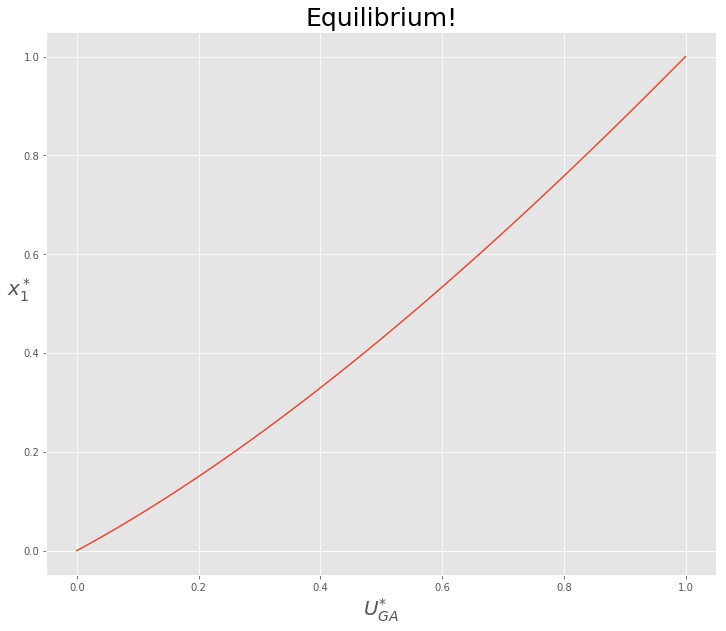

In [44]:
plot_equilibrium(10, 8, 6, 4)

In [21]:
# vectorized numerical function created from our symbolic expression
numeric_f_jac = sym.lambdify((UGA_star, UGA_prime_star, T, R, P, S), evaluated_f_jac, modules="numpy")

In [24]:
def plot_jacobian(T, R, P, S):

    fig, ax = plt.subplots(1, 1, figsize=(12,10))
    ax.set_ylabel(r"$U_{GA}^*$", fontsize=20, rotation="horizontal")
    ax.set_xlabel(r"$U_{GA}^{'*}$", fontsize=20)
    ax.set_title("Negative Jacobian indicates stability!", fontsize=25)
    ax.grid("off")

    equilibrium_selection_probs = np.linspace(0, 1, 100).reshape(-1, 1)
    equilibrium_selection_derivs = np.linspace(0, 2, 200).reshape(1, -1)
    Z = numeric_f_jac(equilibrium_selection_probs, equilibrium_selection_derivs, T, R, P, S)
    cax = ax.imshow(Z, origin="lower")

    levels = np.arange(-0.25, 1.0, 0.25)
    contours = ax.contour(Z, levels=levels, colors='w', origin='lower')
    ax.clabel(contours, contours.levels, inline=True, fontsize=10)

    # adjust the tick labels
    locs, _ = plt.xticks()
    plt.xticks(locs[1:], np.linspace(0, 2, locs.size-1))
    locs, _ = plt.yticks()
    plt.yticks(locs[1:], np.linspace(0, 1, locs.size-1))

    plt.show()

In [25]:
# sliders used to control the Prisoner's Dilemma Payoffs
T_slider = widgets.FloatSlider(value=10, min=0, max=100, step=0.1, description=r"$T$")
R_slider = widgets.FloatSlider(value=8, min=0, max=100, step=0.1, description=r"$R$")
P_slider = widgets.FloatSlider(value=6, min=0, max=100, step=0.1, description=r"$P$")
S_slider = widgets.FloatSlider(value=4, min=0, max=100, step=0.1, description=r"$S$")

w = widgets.interactive(plot_jacobian, T=T_slider, R=R_slider, P=P_slider, S=S_slider)
display(w)

A Jupyter Widget